In [ ]:
import pandas as pd     #import library
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from scipy import stats
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"    #import data
data=pd.read_csv(url)
print("Data import successful")

Data import successful


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.columns


Index(['Hours', 'Scores'], dtype='object')

In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualisation

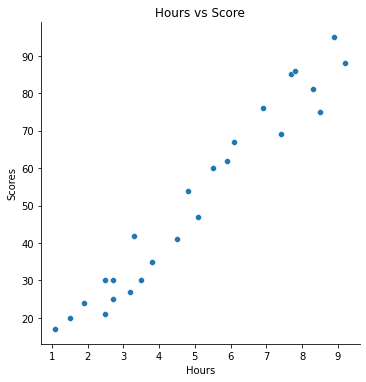

From the above Scatter plot we can see that there exist a linear relationship between the variables


In [ ]:
sns.relplot(x='Hours',y='Scores',data=data)   #visualization od data
plt.title("Hours vs Score")
plt.show()
print("From the above Scatter plot we can see that there exist a linear relationship between the variables")

In [ ]:
data.head(2)

,Hours,Scores
0,2.5,21
1,5.1,47


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


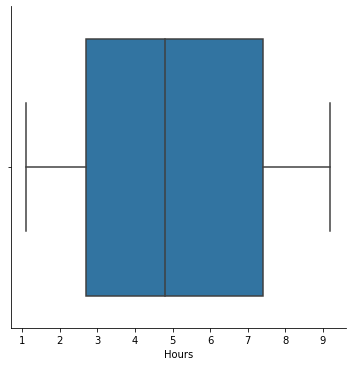

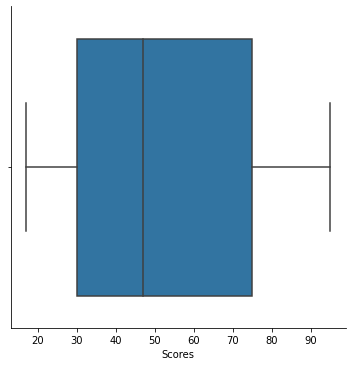

In [ ]:
sns.catplot("Hours",data=data,kind='box')
sns.catplot("Scores",data=data,kind='box')

In [ ]:
cor=data.corr()

In [ ]:
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


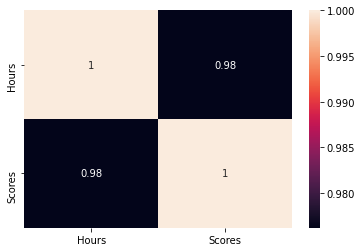

In [ ]:

sns.heatmap(cor,annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


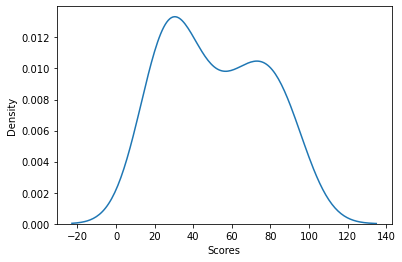

In [ ]:
import seaborn as sns
sns.distplot(data['Scores'],hist=False)      #plotting distribution of score of the data

# Preparing The Data

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [ ]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 
print(f"The size of the train data and test data is{X_train.size,y_train.size,X_test.size,y_test.size}")
print("Training complete.")

The size of the train data and test data is(20, 20, 5, 5)
Training complete.


In [ ]:
reg=LinearRegression()
model=reg.fit(X_train,y_train)

In [ ]:
print(model.coef_),print(model.intercept_)

**The Best fit of the Line is Score=2.018 + 9.912  Hours
Plotting the Model**

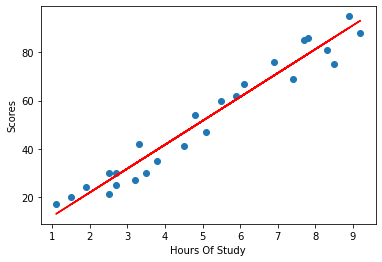

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.xlabel("Hours Of Study")
plt.ylabel("Scores")
plt.show()

# Prediction

In [ ]:
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# 
Step 7 - Comparing Actual result to the Predicted Model result

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


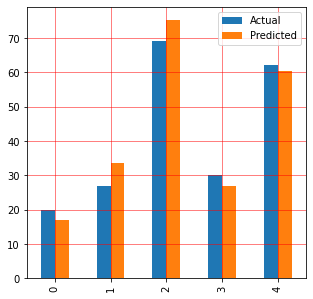

In [ ]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [ ]:
import numpy as np
Hours=9.25
predict_Score=model.predict([[Hours]])
predict_Score
print('Number of Hours=9.25')
print("predict Score=",format(predict_Score[0]))

Number of Hours=9.25
predict Score= 93.69173248737539


In [ ]:
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test,y_pred)),3)
print('Mean Squared Error:',round(metrics.mean_squared_error(y_test,y_pred)),3)
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.0 3
Mean Squared Error: 22.0 3
Root Mean Squared Error: 4.647
R-2: 0.9454906892105354


Here R -Squared = 0.9454 means the model explain 94.54% of the variability in the dependent variable(Score) by Independent variable(Hours)

Thank You¶